In [1]:
import argparse
import random
import sys

import numpy as np
import tensorflow as tf
from mlflow.pyfunc import PythonModel
from mlflow.utils.environment import _mlflow_conda_env
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

from dataprocessing.find_top_movie_with_sequence import find_top_dataset

[[[[0, 0, 2]], 4], [[[0, 0, 1]], 1], [[[0, 0, 3]], 5], [[[0, 0, 4]], 7], [[[0, 3, 1]], 3]]


In [2]:

def prepare_data():
    DATA_DIR = "backup"
    features = np.loadtxt("{}/backup_features_small.txt".format(DATA_DIR))
    labels = np.loadtxt("{}/backup_labels_small.txt".format(DATA_DIR))
    classes = np.loadtxt("{}/classes_small.txt".format(DATA_DIR))
    print("training data : {}".format(len(features)))

    training_data = []
    for i in range(len(labels)):
        training_data.append([[features[i]], labels[i]])
        training_data.append([[labels[i]], features[i]])
    print(training_data)
    print("training size : {}".format(len(training_data)))
    return training_data, classes


/home/ade/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
data = prepare_data()
classes = data[1]
lenSortedClassContents = len(classes)
print("classes : {}".format(lenSortedClassContents))

training_data = data[0]
validation_data = find_top_dataset(training_data)
print("validation data : {}".format(len(validation_data)))

random.shuffle(training_data)
features = []
labels = []
for feature, label in training_data:
    features.append(feature)
    labels.append(label)

X = np.array(features)
Y = np.array(labels)
print(X.shape)

features_val = []
labels_val = []
for feature, label in validation_data:
    features_val.append(feature)
    labels_val.append(label)

X_val = np.array(features_val)
Y_val = np.array(labels_val).astype(np.float32)


training data : 17406
[[[74.0], 43.0], [[43.0], 74.0], [[54.0], 82.0], [[82.0], 54.0], [[73.0], 123.0], [[123.0], 73.0], [[9.0], 11.0], [[11.0], 9.0], [[98.0], 66.0], [[66.0], 98.0], [[66.0], 125.0], [[125.0], 66.0], [[18.0], 47.0], [[47.0], 18.0], [[93.0], 82.0], [[82.0], 93.0], [[82.0], 141.0], [[141.0], 82.0], [[127.0], 134.0], [[134.0], 127.0], [[134.0], 4.0], [[4.0], 134.0], [[110.0], 91.0], [[91.0], 110.0], [[79.0], 66.0], [[66.0], 79.0], [[68.0], 69.0], [[69.0], 68.0], [[69.0], 121.0], [[121.0], 69.0], [[121.0], 26.0], [[26.0], 121.0], [[116.0], 111.0], [[111.0], 116.0], [[73.0], 109.0], [[109.0], 73.0], [[116.0], 141.0], [[141.0], 116.0], [[116.0], 23.0], [[23.0], 116.0], [[141.0], 82.0], [[82.0], 141.0], [[82.0], 111.0], [[111.0], 82.0], [[82.0], 141.0], [[141.0], 82.0], [[133.0], 134.0], [[134.0], 133.0], [[134.0], 86.0], [[86.0], 134.0], [[23.0], 125.0], [[125.0], 23.0], [[116.0], 141.0], [[141.0], 116.0], [[133.0], 106.0], [[106.0], 133.0], [[46.0], 82.0], [[82.0], 46.0], [

validation data : 150
(34812, 1)


In [6]:
model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(X.shape[1:])))
model.add(Dense(512, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(lenSortedClassContents))
model.add(Activation("softmax"))
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [7]:
history = model.fit(X, Y, epochs=250, batch_size=64, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/2
2176/2176 [==============================] - 4s 2ms/step - loss: 4.7372 - accuracy: 0.0361 - val_loss: 4.3965 - val_accuracy: 0.1000
Epoch 2/2
2176/2176 [==============================] - 5s 2ms/step - loss: 4.6306 - accuracy: 0.0501 - val_loss: 4.1442 - val_accuracy: 0.1067


In [10]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

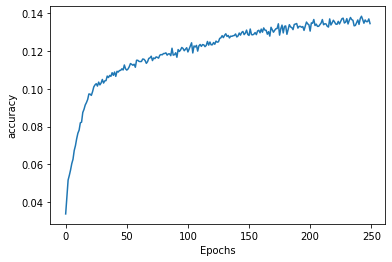

In [11]:
plot_graphs(history, 'accuracy')

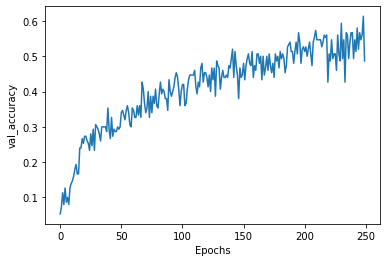

In [12]:
plot_graphs(history, 'val_accuracy')

In [8]:
classes = list(classes)
def get5TopPredict(predict):
    predicts = predict[0].argsort()[-5:][::-1]
    for i in predicts:
        print("test", i)
        print(classes[i])

In [9]:
def predictDense(first):
    predict = model.predict([[classes.index(first)]])
    get5TopPredict(predict)
    return classes[np.argmax(predict[0])]

In [10]:
predictResult = predictDense(700)

test 108
1756.0
test 77
1433.0
test 116
1795.0
test 82
1506.0
test 39
683.0
